<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/I_V_Curves_for_Various_Electronic_Devices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

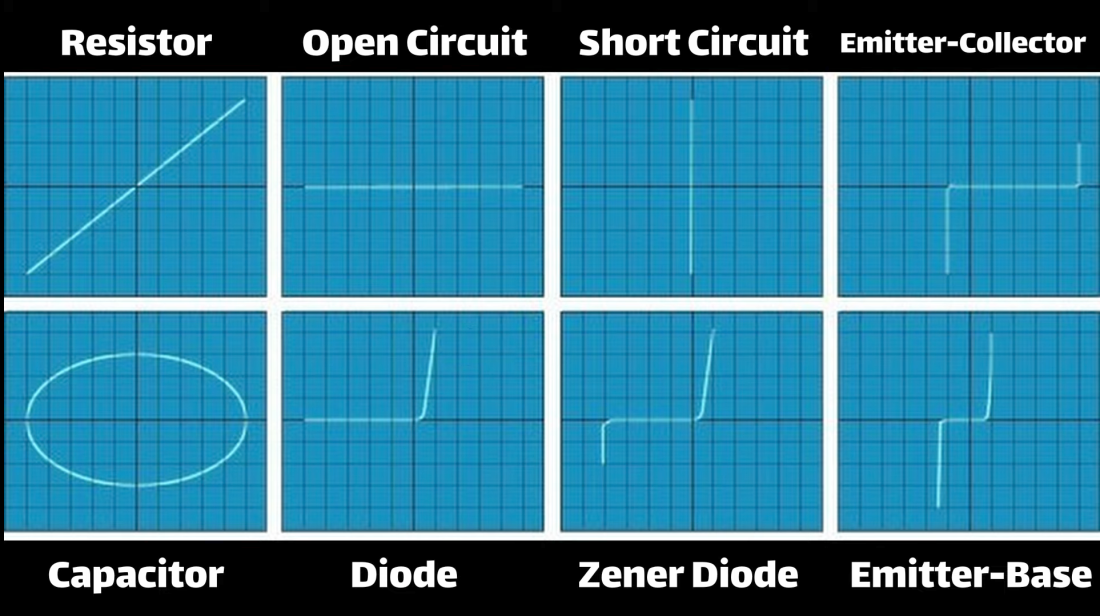

The image above was borrowed from:  https://youtu.be/O7xH9ZSp_B4?si=ZCImPdKOD_8m8aUI&t=894

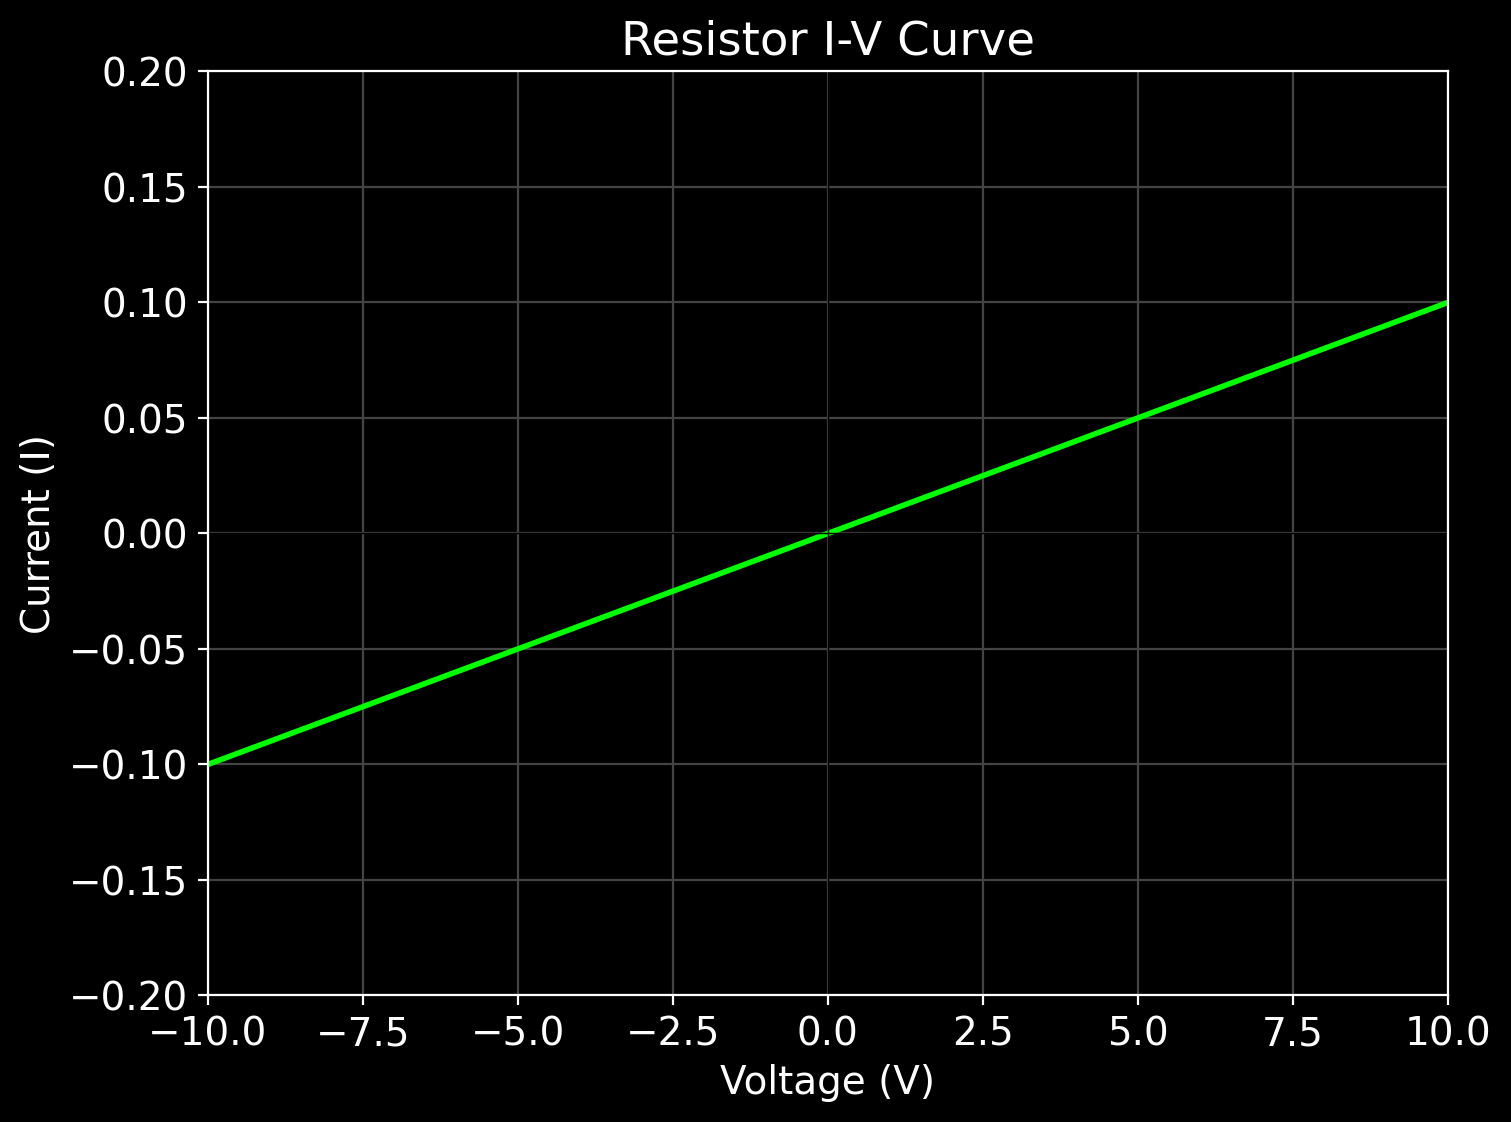

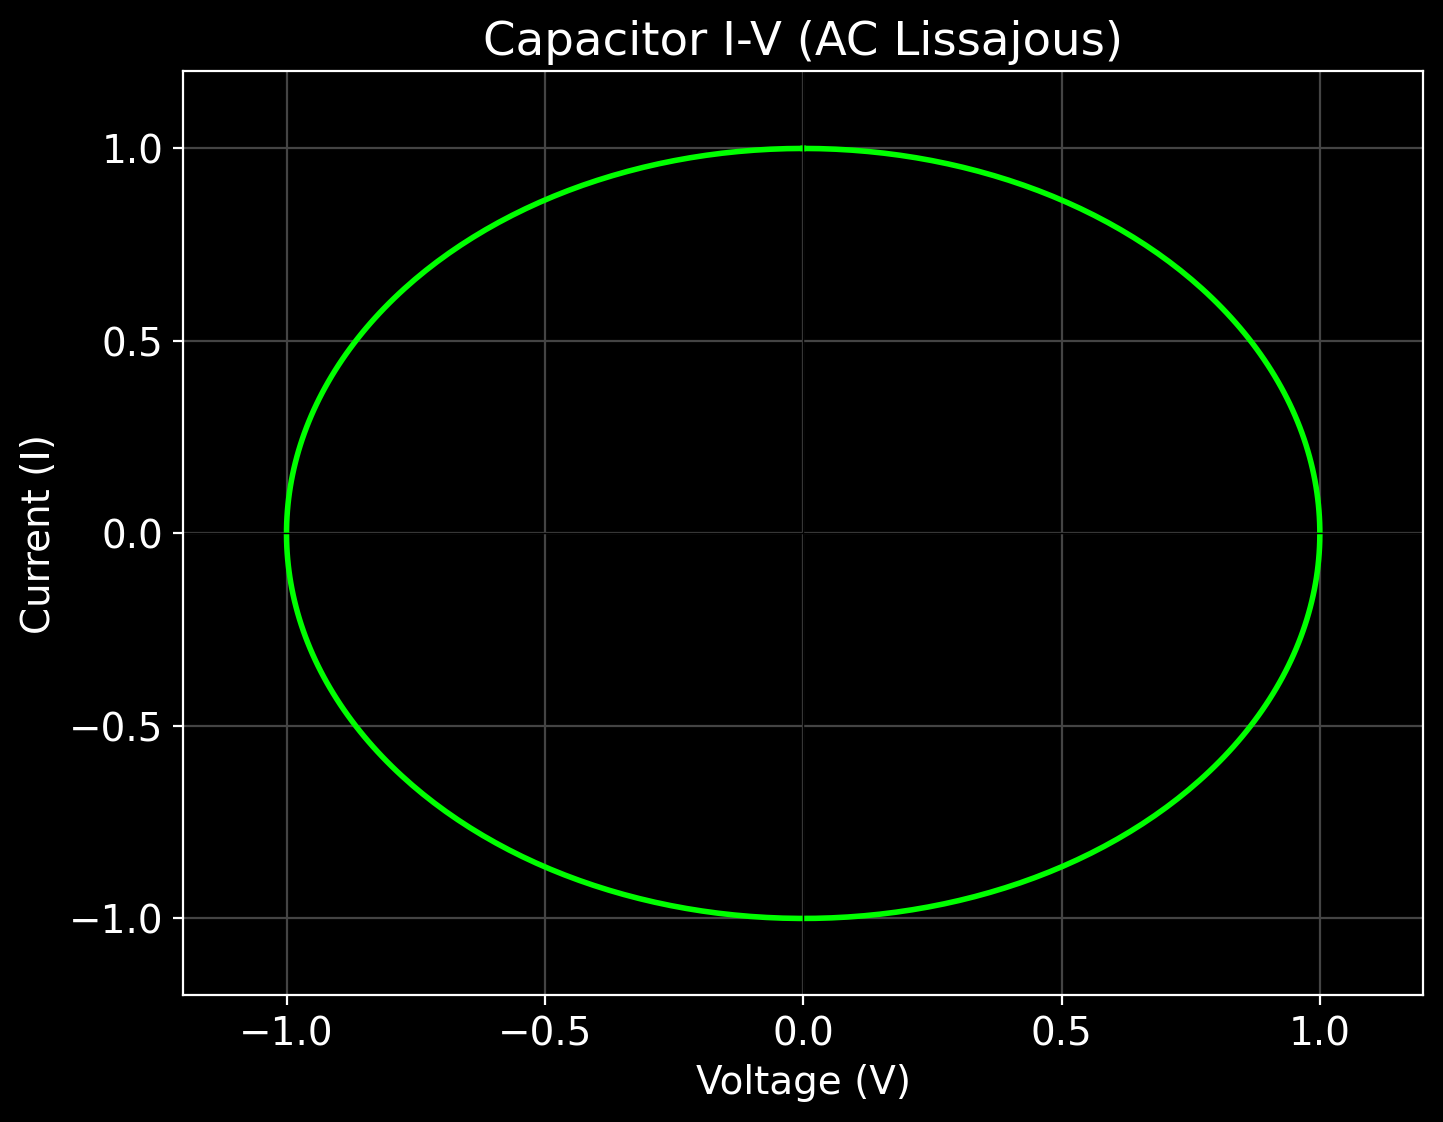

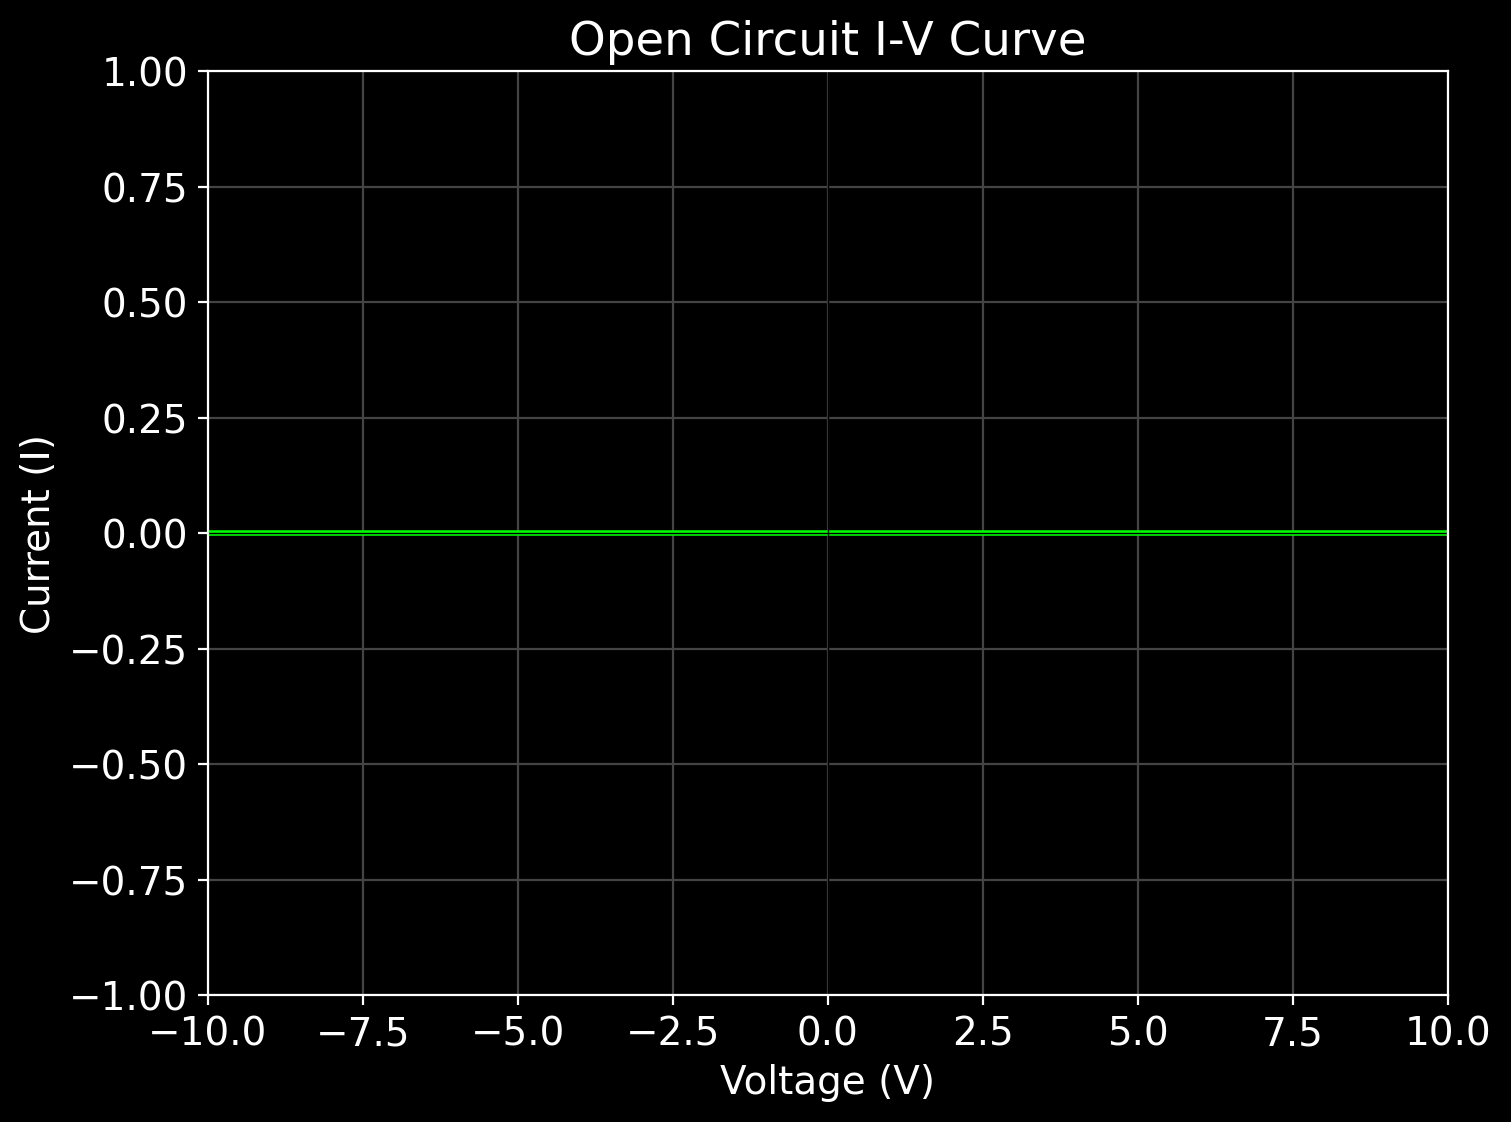

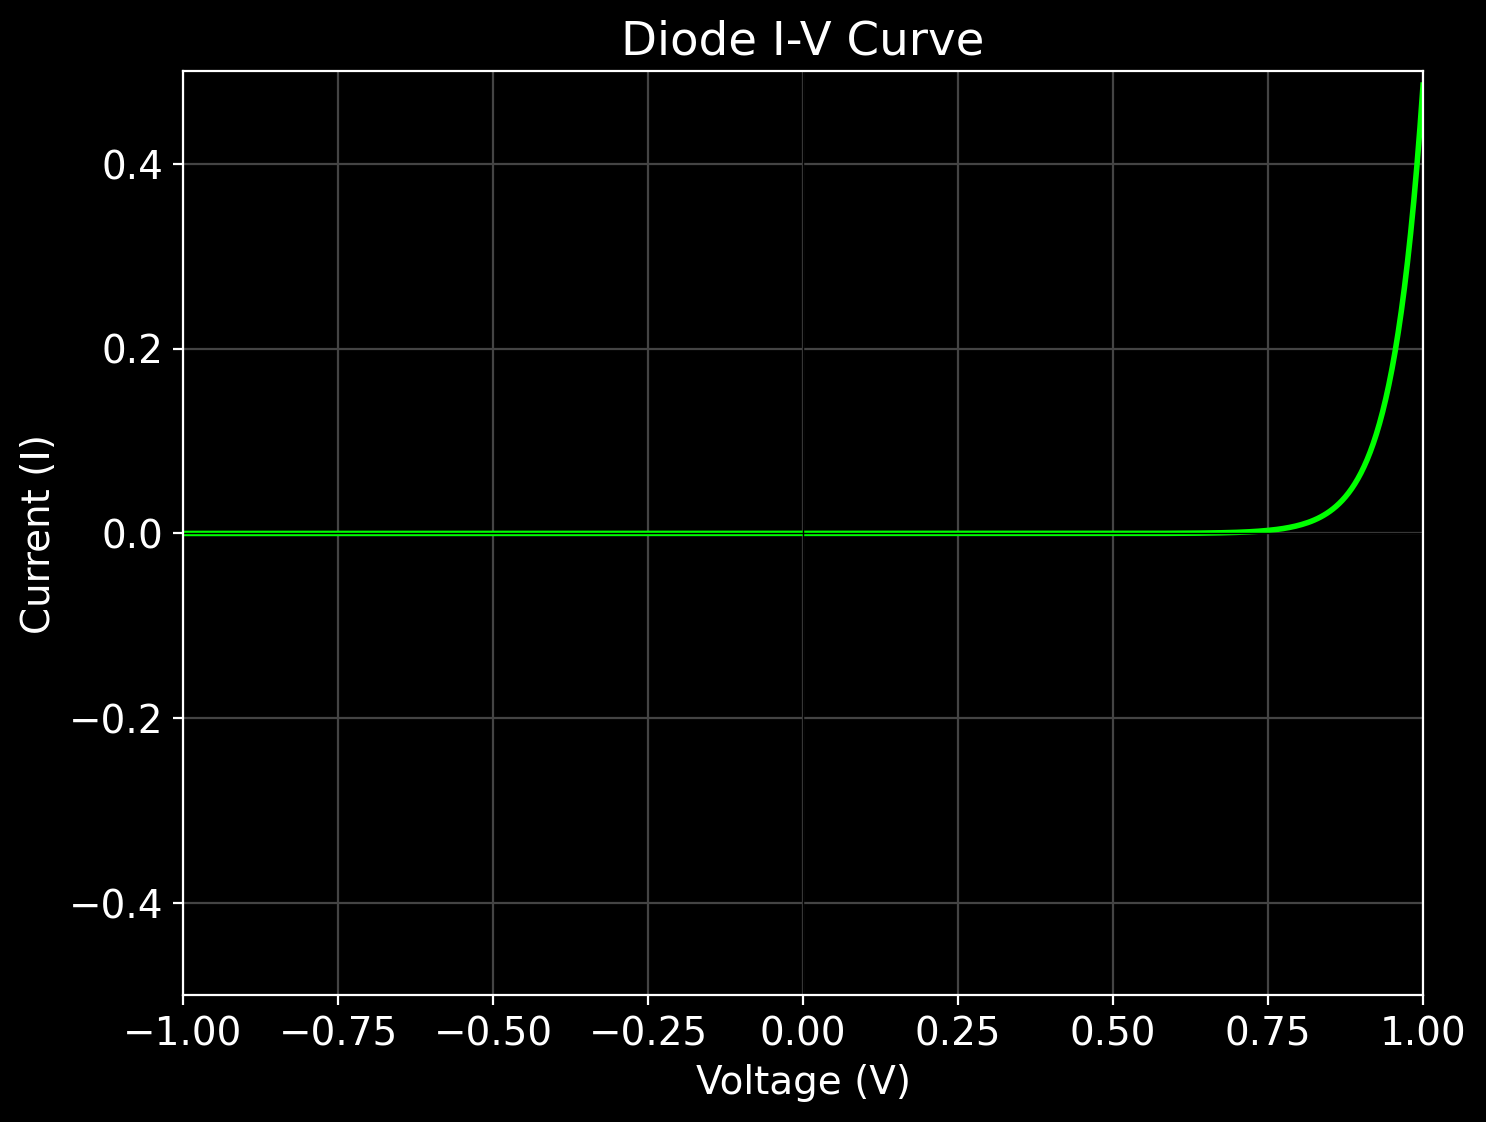

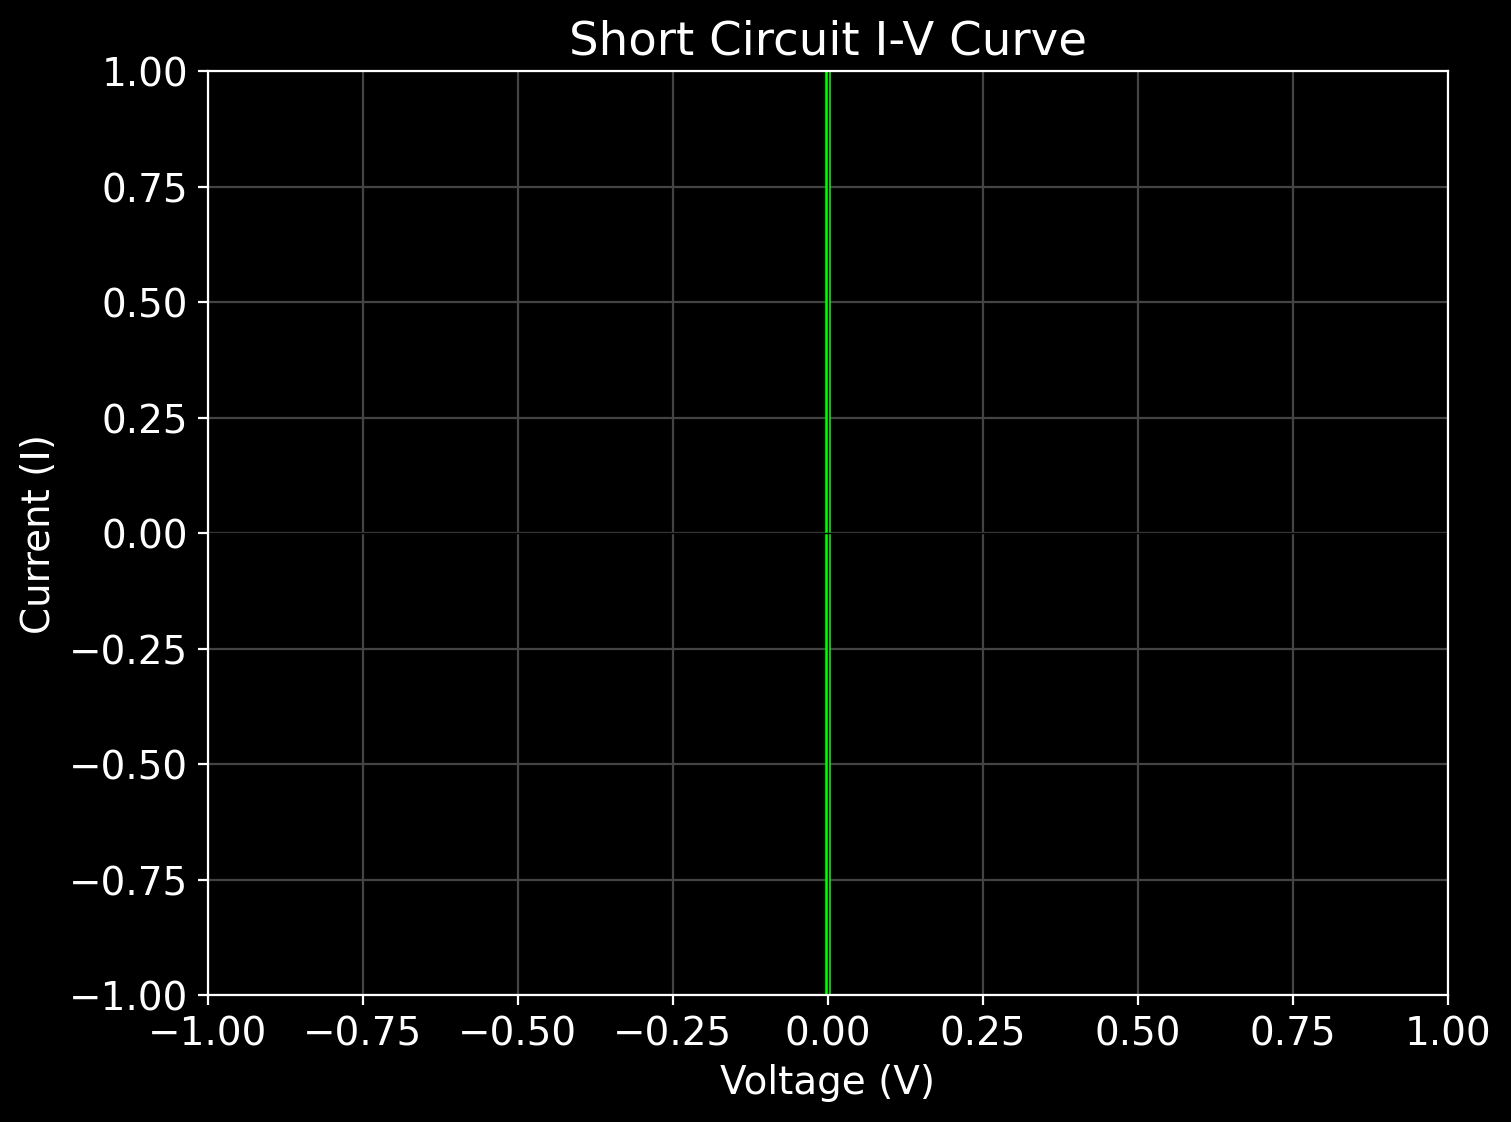

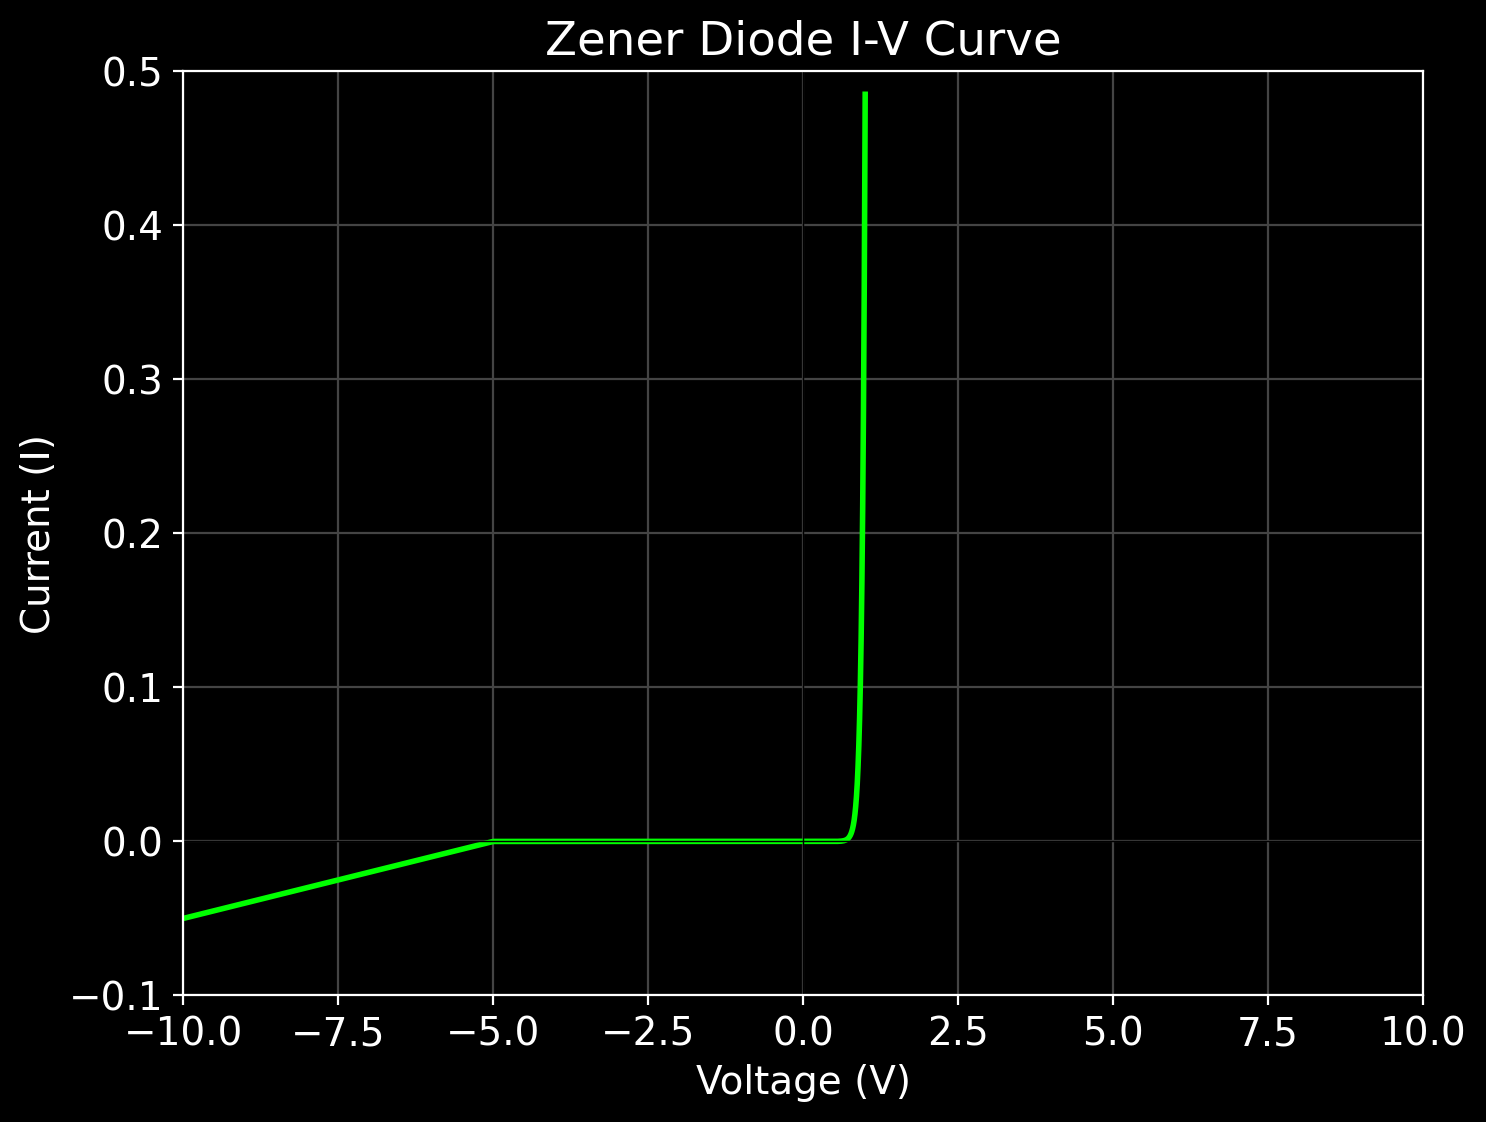

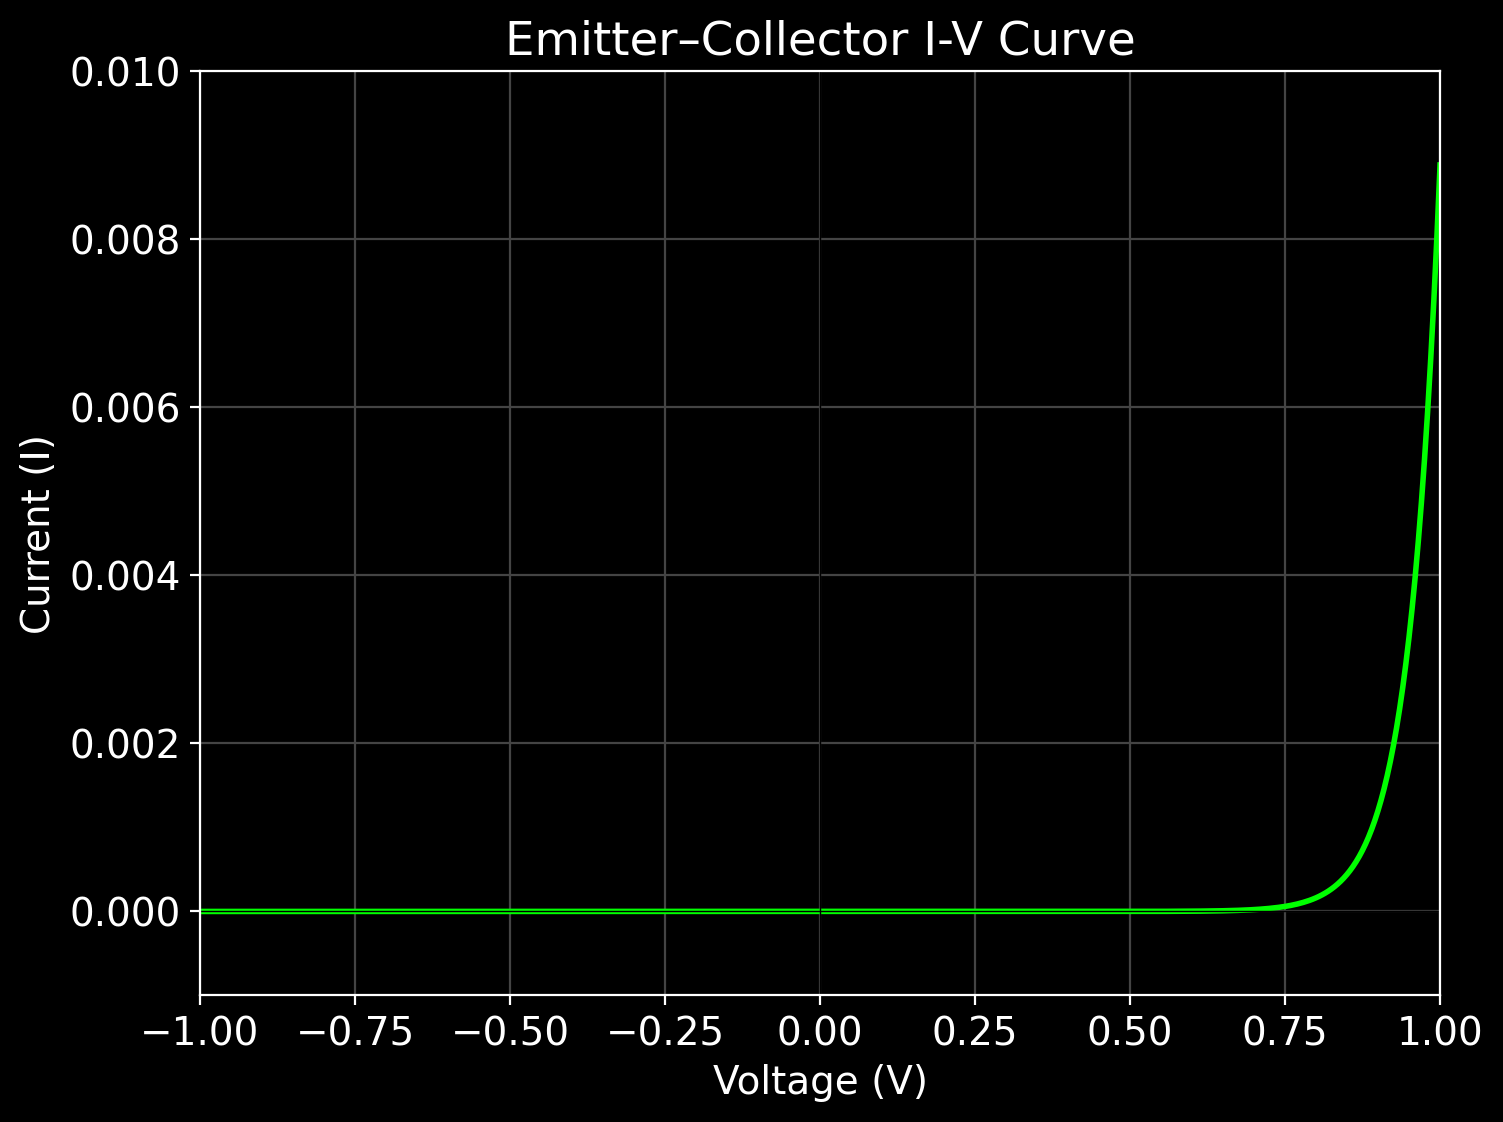

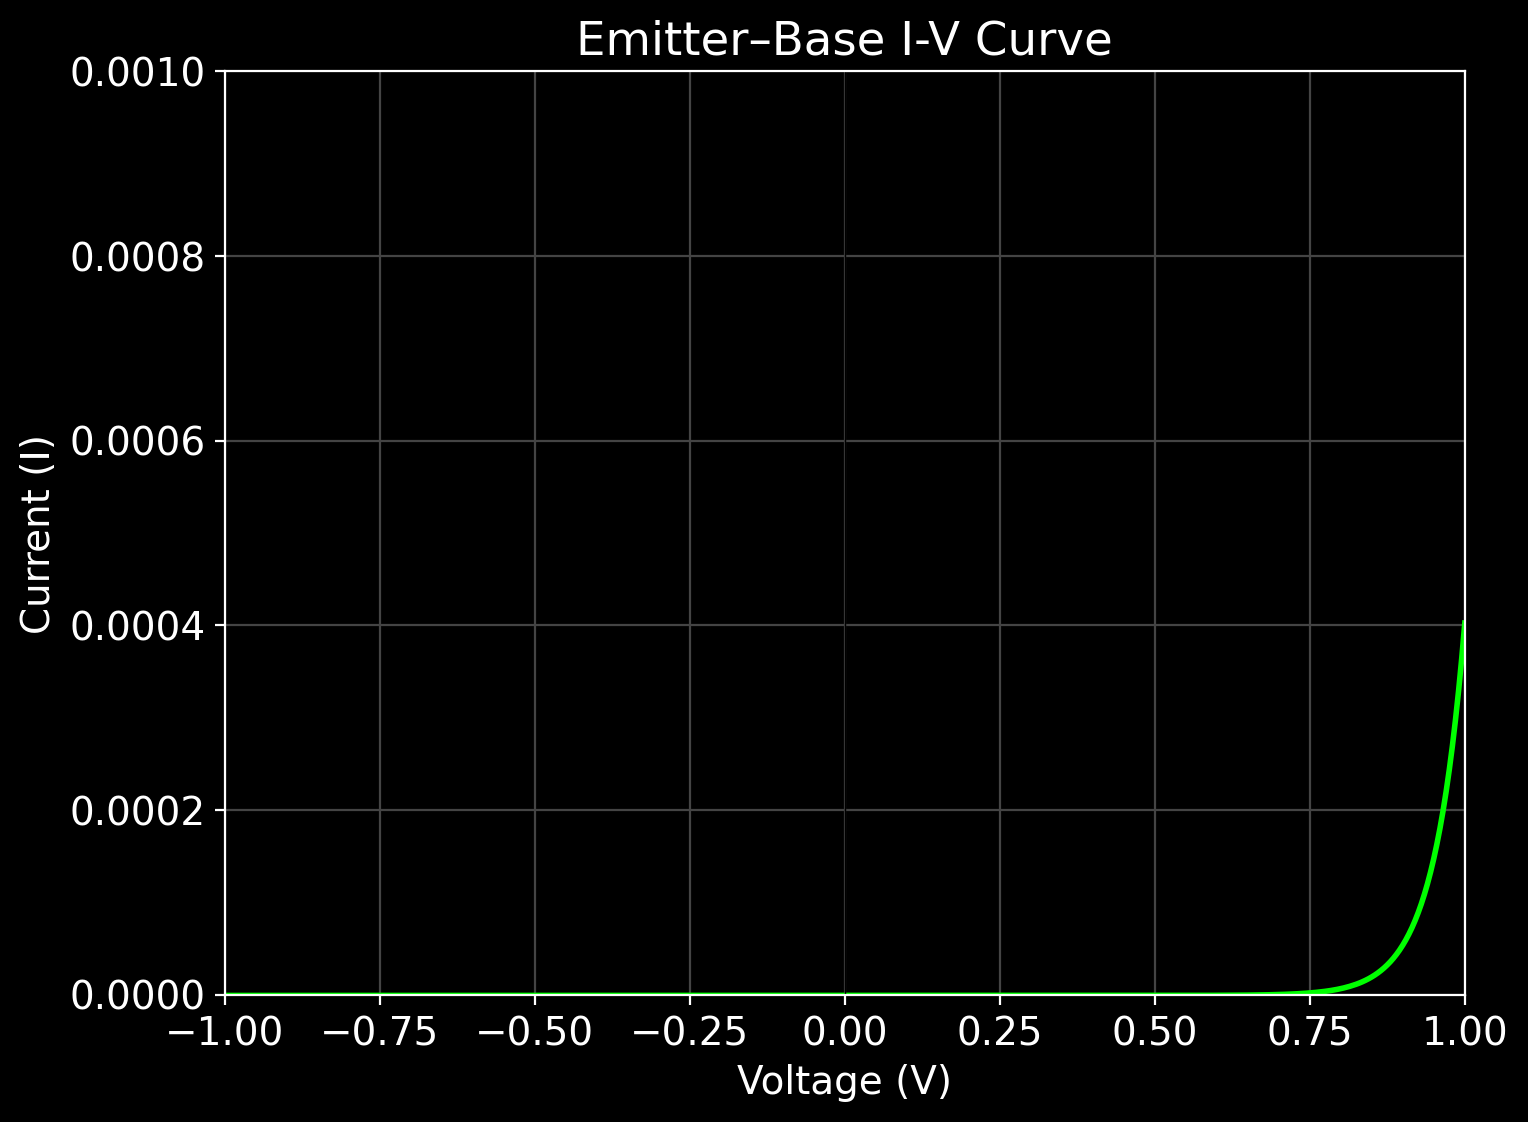

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at the beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# High contrast plotting style via rcParams
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
plt.rcParams['axes.edgecolor'] = '#FFFFFF'
plt.rcParams['axes.labelcolor'] = '#FFFFFF'
plt.rcParams['xtick.color'] = '#FFFFFF'
plt.rcParams['ytick.color'] = '#FFFFFF'
plt.rcParams['text.color'] = '#FFFFFF'
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['grid.color'] = '#444444'

# ---------------------------
# 1. Resistor I-V Curve
# ---------------------------
R = 100.0  # resistance in ohms
V_res = np.linspace(-10, 10, 400)
I_res = V_res / R

plt.figure()
plt.plot(V_res, I_res, color='lime')
plt.title('Resistor I-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
# Draw horizontal and vertical axes through zero:
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
# Set symmetric limits so that 0 is in the center:
plt.xlim(-10, 10)
plt.ylim(-0.2, 0.2)
plt.grid(True)
plt.show()


# ---------------------------
# 2. Capacitor I-V (AC Response)
# ---------------------------
# For an AC capacitor the voltage and current are 90° out of phase.
# When driven with a sine wave, a parametric plot (a Lissajous figure)
# of I = C dV/dt vs. V yields an ellipse (in our case, a circle).
t = np.linspace(0, 2*np.pi, 400)
V_cap = np.sin(t)      # voltage (arbitrary amplitude)
I_cap = np.cos(t)      # current (90° phase lead; here we choose amplitude=1)
plt.figure()
plt.plot(V_cap, I_cap, color='lime')
plt.title('Capacitor I-V (AC Lissajous)')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid(True)
plt.show()


# ---------------------------
# 3. Open Circuit I-V Curve
# ---------------------------
# An ideal open circuit has zero current for any applied voltage.
V_open = np.linspace(-10, 10, 400)
I_open = np.zeros_like(V_open)
plt.figure()
plt.plot(V_open, I_open, color='lime')
plt.title('Open Circuit I-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.grid(True)
plt.show()


# ---------------------------
# 4. Diode I-V Curve
# ---------------------------
# A simple diode is modeled using a Shockley exponential:
# I = I_s * (exp(V/V0) - 1)
# (Parameters have been adjusted so that the curve is visible on a modest scale.)
I_s_diode = 1e-9
V0_diode = 0.05
V_diode = np.linspace(-1, 1, 400)
I_diode = I_s_diode * (np.exp(V_diode / V0_diode) - 1)
plt.figure()
plt.plot(V_diode, I_diode, color='lime')
plt.title('Diode I-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
# Use symmetric limits around zero:
plt.xlim(-1, 1)
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.show()


# ---------------------------
# 5. Short Circuit I-V Curve
# ---------------------------
# An ideal short circuit produces zero voltage regardless of the current.
I_short = np.linspace(-1, 1, 400)
V_short = np.zeros_like(I_short)
plt.figure()
plt.plot(V_short, I_short, color='lime')
plt.title('Short Circuit I-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.show()


# ---------------------------
# 6. Zener Diode I-V Curve
# ---------------------------
# A Zener diode behaves like a normal diode in forward bias.
# In reverse bias it remains nearly “clamped” until breakdown.
# Here we model it piecewise:
#   For V >= 0: use the diode equation.
#   For V < 0: if V > Vz (here Vz = -5 V) then very little conduction;
#            for V <= Vz, assume a linear increase in reverse current.
I_s_zener = 1e-9
V0_zener = 0.05
Vz = -5.0  # approximate Zener breakdown voltage

# Reverse bias: from -10 V to 0 V
V_rev = np.linspace(-10, 0, 400)
# For V > -5 V (before breakdown) use nearly zero conduction;
# for V <= -5, add a small linear conduction.
I_rev = np.where(V_rev > Vz, -I_s_zener, -I_s_zener + 0.01*(V_rev - Vz))

# Forward bias: from 0 V to 1 V (using the diode equation)
V_fwd = np.linspace(0, 1, 400)
I_fwd = I_s_zener * (np.exp(V_fwd / V0_zener) - 1)

# Combine the two halves:
V_zener = np.concatenate((V_rev, V_fwd))
I_zener = np.concatenate((I_rev, I_fwd))

plt.figure()
plt.plot(V_zener, I_zener, color='lime')
plt.title('Zener Diode I-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
# Here we “zoom out” to show reverse and forward regions.
plt.xlim(-10, 10)
plt.ylim(-0.1, 0.5)
plt.grid(True)
plt.show()


# ---------------------------
# 7. Emitter–Collector I-V Curve (Transistor Junction)
# ---------------------------
# In a bipolar transistor, the emitter–collector junction (when forward-biased)
# can be approximated by a diode with a lower forward drop.
def emitter_collector(V):
    I_s = 1e-9
    V0 = 0.05
    # For V >= 0, use a diode-like exponential shifted by ~0.2 V (saturation drop);
    # for V < 0, assume a very small reverse leakage.
    return np.where(V >= 0, I_s * (np.exp((V - 0.2) / V0) - 1), -I_s)

V_ec = np.linspace(-1, 1, 400)
I_ec = emitter_collector(V_ec)
plt.figure()
plt.plot(V_ec, I_ec, color='lime')
plt.title('Emitter–Collector I-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1, 1)
# The forward conduction current is in the milliamp range.
plt.ylim(-0.001, 0.01)
plt.grid(True)
plt.show()


# ---------------------------
# 8. Emitter–Base I-V Curve (Transistor Junction)
# ---------------------------
# The emitter–base junction is like a diode with a typical turn-on of ~0.7 V.
def emitter_base(V):
    I_s = 1e-6  # chosen larger to show a more pronounced conduction
    V0 = 0.05
    return np.where(V >= 0, I_s * (np.exp((V - 0.7) / V0) - 1), -I_s)

V_eb = np.linspace(-1, 1, 400)
I_eb = emitter_base(V_eb)
plt.figure()
plt.plot(V_eb, I_eb, color='lime')
plt.title('Emitter–Base I-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1, 1)
# With these parameters, forward conduction reaches a few hundred microamps.
plt.ylim(-1e-6, 1e-3)
plt.grid(True)
plt.show()
